# 추론과 일반화
## 추론 
* 추론(inference)은 학습이 완료된 모델로부터 새로운 데이터를 입력하여 예측 결과를 도출하는 과정입니다. 
* 학습된 모델에서 새로운 데이터로 예측을 했을 때 제대로 된 결과를 도출하지 못하고 엉뚱한 값을 출력할 수 있습니다. 
* 이런 모델은 학습 데이터에 너무 맞게 학습이 되어 새로운 데이터를 예측하지 못하며 이런 모델을 과적합(overfitting)된 모델이라고 합니다. 
## 일반화 
* 머신러닝을 학습할 때는 데이터의 특성이 잘 반영되면서 편향되지 않게 학습을 진행하는 것이 중요합니다. 
* 새로운 데이터를 추론을 한다고 하여도 성능 차이가 발생하지 않게 하는 것이 일반화(generalization)라고 합니다. 
* 테스트 데이터에서 만들어내는 오차를 일반화 오차라 부릅니다. 
* 훈련 데이터에서와 같이 테스트 데이터에서도 좋은 성능을 내는 모델은 일반화가 잘 된 모델이라고 부릅니다. 
* 모델이 너무 훈련 데이터에 과하게 학습을 하지 않도록 하는 많은 일반화 방법들이 존재합니다. 

# 과적합(Overfitting)/과소적합(Underfitting)
* 과적합과 과소적합 모두 제대로 훈련된 모델이라고 볼 수 없습니다. 

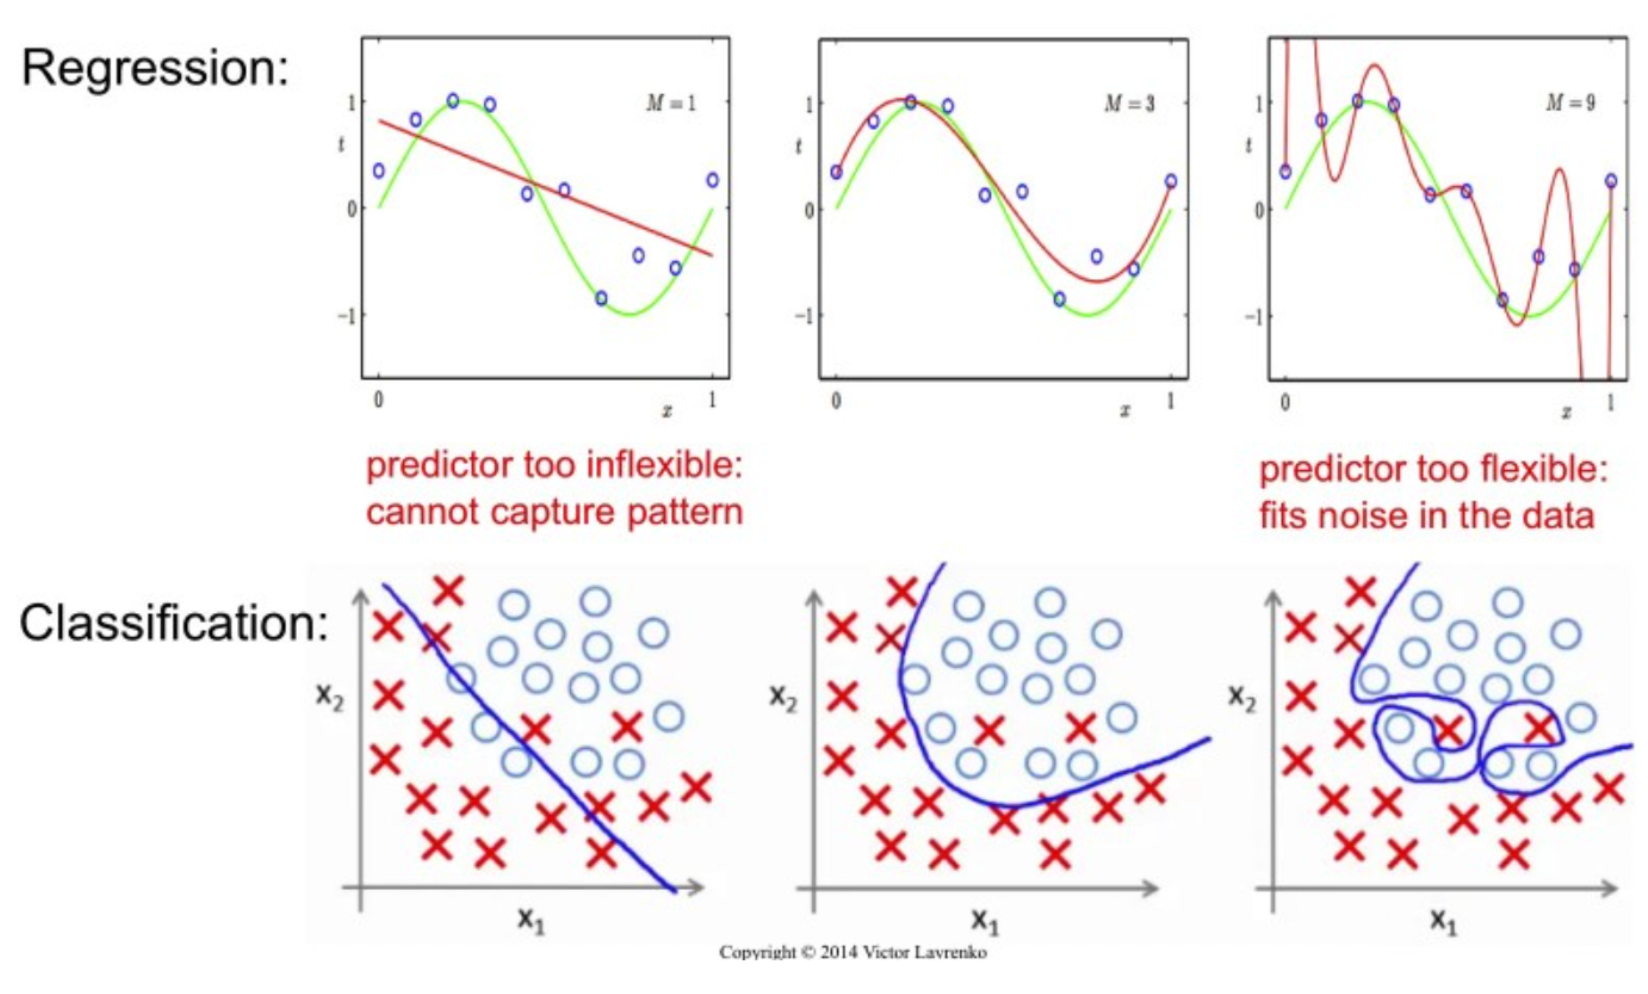

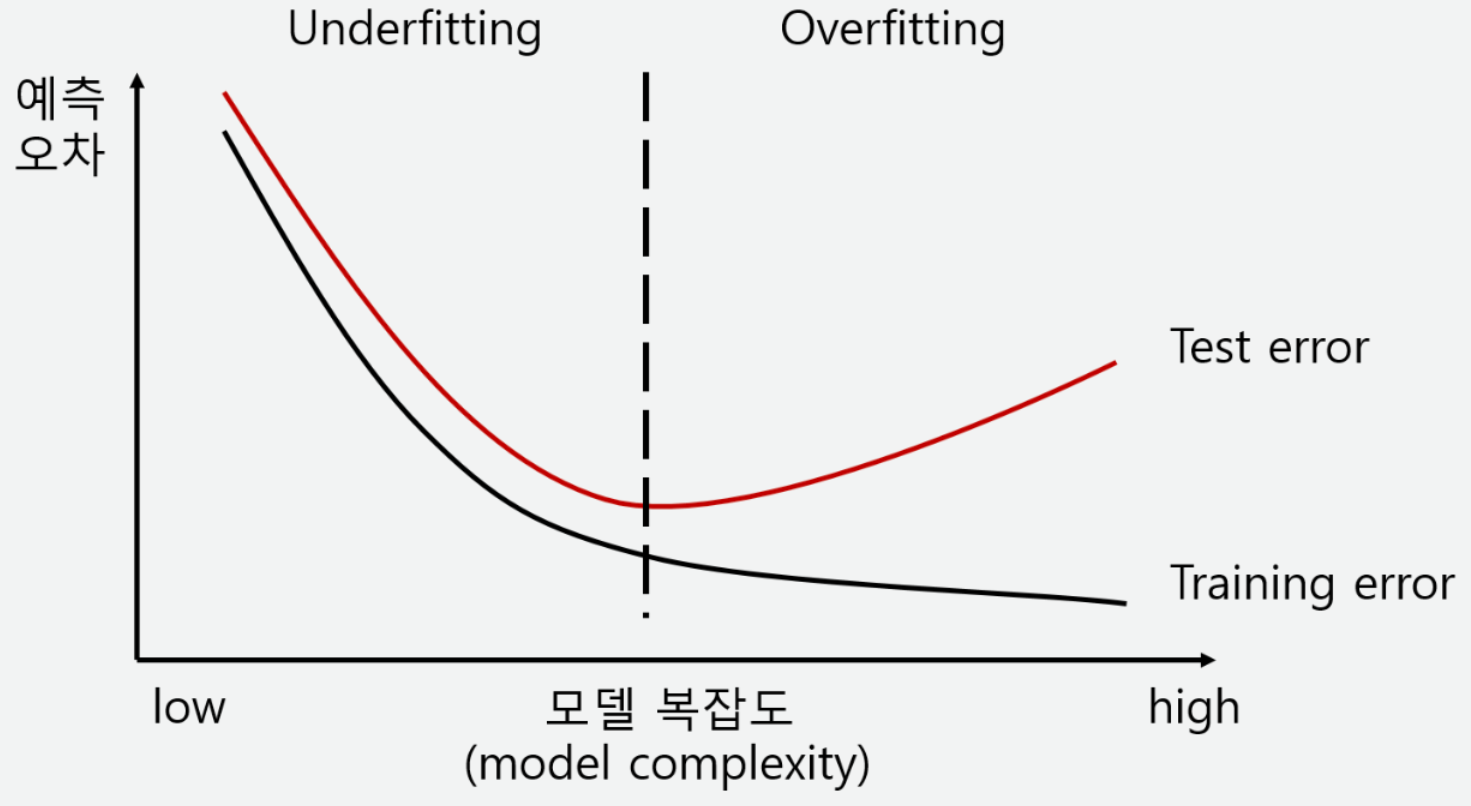

## 과대적합(overfitting)
* 모델이 학습데이터에 필요 이상으로 적합하여 새로운 데이터에 대한 예측력이 떨어집니다. 
* 제한된 학습 데이터 세트에 너무 과하게 특화되어 새로운 데이터에 대한 오차가 커지는 현상을 의미합니다. 
  

## 과소적합(underfitting)
  - 모델이 학습데이터를 제대로 적합하지 못하는 경우를 이야기합니다. 
  - 데이터 내에 존재하는 규칙도 제대로 학습 못함.
  - 위의 그림의 왼쪽처럼 단순히 직선으로 추정하는 경우는 학습 데이터뿐만 아니라 실제 데이터에서도 큰 오차를 발생합니다. 

# 예제

In [1]:
import seaborn as sns

df = sns.load_dataset('titanic')

In [2]:
cols = ["age","sibsp","parch","fare"]
features = df[cols]
target = df["survived"]

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

cols = ["pclass","sex","embarked"]
enc = OneHotEncoder()
tmp = pd.DataFrame(
    enc.fit_transform(df[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
tmp
features = pd.concat([features,tmp],axis=1)
features.head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_nan
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [4]:
features.age = features.age.fillna(-1)
features.isnull().sum().sum()

0

In [5]:
from sklearn.model_selection import train_test_split
SEED=42

x_train,x_valid, y_train,y_valid= train_test_split(features,target,random_state=SEED,test_size=0.2)

x_train.shape,x_valid.shape, y_train.shape,y_valid.shape

((712, 13), (179, 13), (712,), (179,))

## 모델 복잡도에 따른 overfitting 예제
* Decision Tree의 단점 중 하나는 쉽게 과적합이 된다는 점입니다. 
* 이 점을 이용하여 모델을 과적합을 시키겠습니다. 
* 학습된 모델이 복잡하다는 이야기는 학습 데이터에 과도하게 적합되었다는 의미입니다. 

In [6]:
from sklearn.tree import DecisionTreeClassifier
SEED = 42

model = DecisionTreeClassifier(max_depth=20,random_state=SEED)
model.fit(x_train,y_train)
model.score(x_train,y_train) , model.score(x_valid,y_valid)

(0.9803370786516854, 0.770949720670391)

## 모델 복잡도를 줄인 예제
* 모델을 단순하게 만들면 과적합을 피할 수 있습니다. 
* 하지만 너무 단순해지면 과소적합이 일어날 수 있습니다. 

In [7]:
model = DecisionTreeClassifier(max_depth=3,random_state=SEED)
model.fit(x_train,y_train)
model.score(x_train,y_train) , model.score(x_valid,y_valid)

(0.8146067415730337, 0.7932960893854749)

# 과대적합 방지 
- 학습 데이터 세트만을 가지고 실제 데이터의 오차가 증가하는 지점을 정확히 예측하는 것은 불가능합니다.
- 테스트 데이터 세트를 활용하여 모델의 예측을 성능평가를 통해 상대적으로 우수한 모델을 구분해야 합니다. 
- 과대적합을 방지하기 위한 방법에는 데이터의 양 늘리기, 모델의 복잡도 줄이기, 규제등이 있습니다. 

# 편향(Bias)과 분산(Variance)
- 편향이란 예측값과 정답의 떨어져 있는 정도
- 분산이란 예측값들이 자기들끼리 떨어져 있는 정도 
- 예측값들과 정답이 대체로 멀리 떨어져 있으면 결과의 편향이 높다고 말하고, 예측값들이 자기들끼리 대체로 멀리 흩어져 있으면 분산이 높다고 말합니다. 

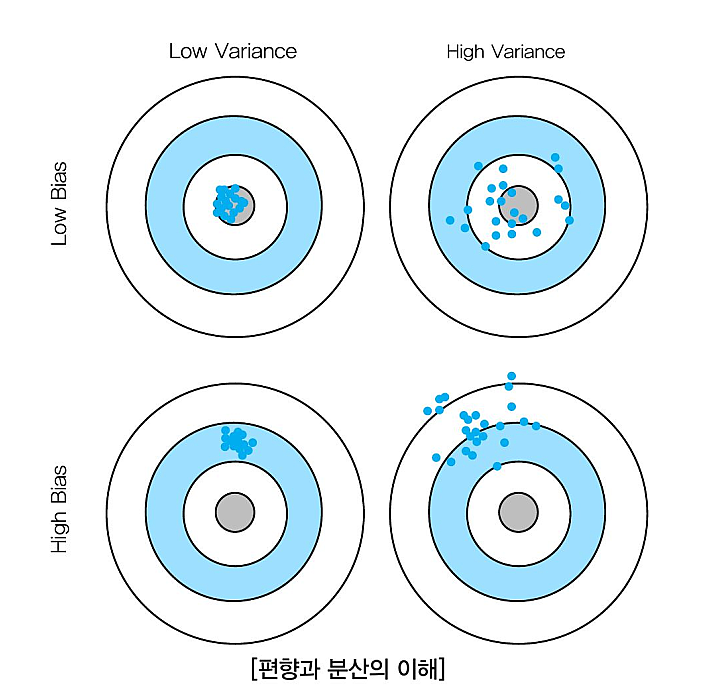

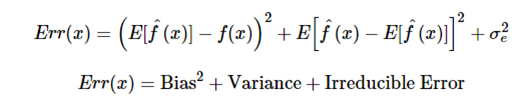


- 편향과 분산은 데이터 분석모형의 복잡도와 관련이 많으며, 일반적으로 과적합된 모형(훈련이 너무 심하게 되어 있거나 복잡한 모형)의 경우 편향이 낮고, 분산은 높으며, 과소적합된 모형은 편향이 높고, 분산은 낮습니다.
- 즉 편향과 분산은 한쪽이 증가하면 다른 한쪽이 감소하는 Trade-off 관계에 있습니다. 
- 편향과 분산이 서로 Trade-off를 이루면서 오류의 비용이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법입니다. 

# 규제(Regularization)
- 선형 모델의 비용 함수는 RSS(Residual Sum of Squares, 잔차)를 최소화하는 방향으로 곧, 실제 값과 예측값의 차이를 최소화하는 것만 고려했습니다. 
- 그 결과 학습 데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커지는 현상이 발생합니다. 이럴 경우 변동성이 심해져서 테스트 데이터 세트에서는 예측 성능이 저하되기 쉽습니다. 
- 이를 반영해 비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루어야 합니다. 

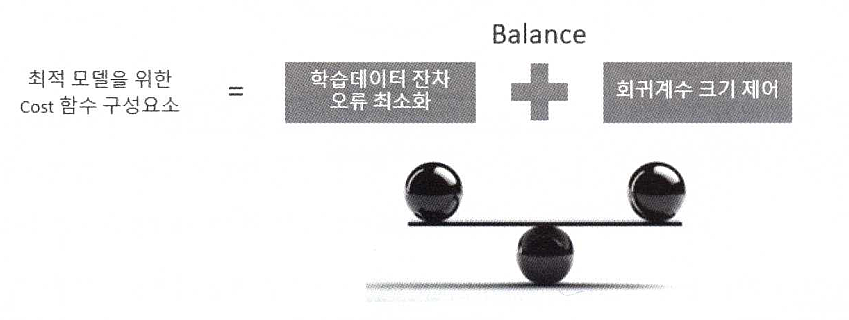

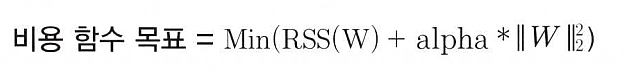

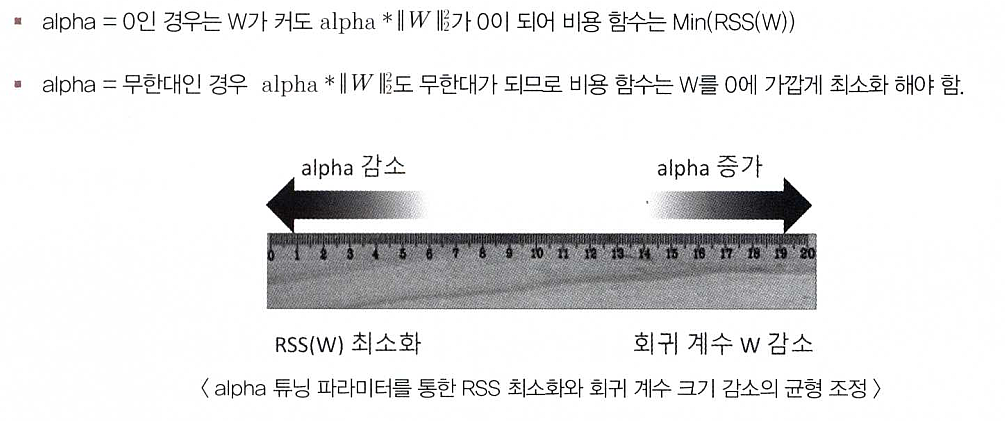

- alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제(Regularization)이라고 부릅니다. 
- 규제는 L1방식과 L2 방식으로 구분됩니다. 

### L1
- W의 절댓값에 대해 패널티 부여
### L2 
 - W의 제곱에 대해 페널티 부여

## Ridge 
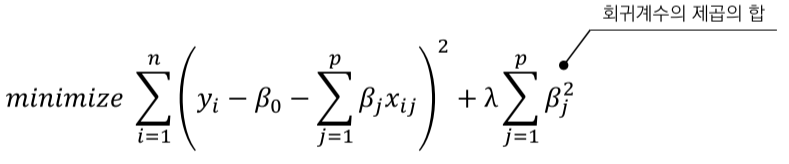
 - L2 규제를 적용한 방법입니다. 
 - 회귀계수의 제곱의 합을 대입합니다. 
 - alpha 값이 크면 클수록 많은 회귀계수를 0으로 수렴시킵니다. 

## Lasso
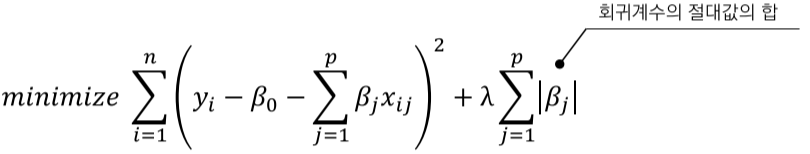
 - L1 규제를 적용한 방법입니다. 
 - 회귀계수의 절대값의 합을 대입합니다. 
 - alpha 값이 크면 클수록 많은 회귀계수를 0이 됩니다. 

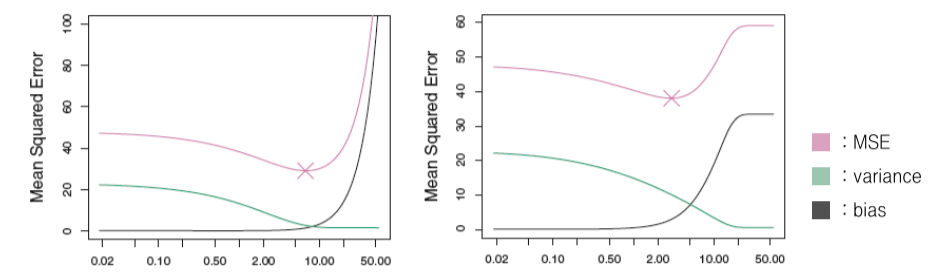

- alpha 값을 변화시켜가며 MSE가 최소일 때의 alpha를 탐색합니다. 

## Ridge와 Lasso의 차이점 
- Ridge는 계수를 축소화되 0에 가까운 수로 축소하지만, Lasso는 계수를 완전히 0으로 축소합니다. 
- 두 방식 모두 RSS를 희생하여 계수를 축소하지만 Lasso의 경우 회귀계수가 0이 될 수 있지만, Ridge는 불가능 

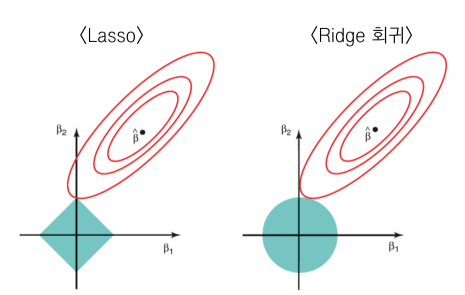

## 용도 
- 일반적으로 Ridge를 조금 더 선호한다고 알려져 있습니다. 

### Ridge 
- 입력 변수들이 전반적으로 비슷한 수준으로 출력 변수에 영향을 미치는 경우에 사용 
### Lasso
- 출력 변수에 미치는 입력 변수의 영향력 편차가 큰 경우에 사용

## 엘라스틱넷 
- L2 규제와 L1규제를 결합한 방식 
- Lasso가 서로 상관관계가 높은 특성들의 경우에 이들 중에서 중요 특성만을 선택하고 다른 특성들은 모두 회귀 계수를 0으로 만드는 성향이 강합니다. 
- 특히 이러한 성향으로 인해 alpha값에 따라 회귀 계수의 값이 급격히 변동할 수도 있는데, 엘라스틱넷 회귀는 이를 완화하기 위해 L2규제를 Lasso에 추가한 것입니다. 
- 단점은 L1과 L2 규제가 결합된 규제로 인해 수행시간이 오래 걸린다는 점입니다. 

In [1]:
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet